<a href="https://colab.research.google.com/github/heloisebastos/Logica-Fuzzy-Classificacao-Qualidade-Ar/blob/main/Sistema_Qualidade_Ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine que você é o proprietário de uma cafeteria e deseja criar um sistema fuzzy para classificar a qualidade do café que seus baristas preparam. Você decidiu usar a temperatura e a quantidade de açúcar como entradas para o sistema e as classes de qualidade de café: "Ruim", "Regular" e "Bom".


Obs.: Para o problema de classificar a qualidade de um café com base na temperatura e na quantidade de açúcar

Primeiro, instale a biblioteca skfuzzy:



In [ ]:
!pip install -U scikit-fuzzy

Em seguida, importe as bibliotecas necessárias:


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Crie as variáveis de entrada e saída fuzzy:

In [ ]:
# Variáveis de entrada
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')

# Variável de saída
velocidadeVentilador = ctrl.Consequent(np.arange(0, 101, 1), 'velocidade do ventilador', defuzzify_method='centroid')

Em seguida, vamos definir as funções de pertinência para cada variável fuzzy. Para a temperatura, vamos definir três funções: "baixa", "média" e "alta". Para o açúcar, vamos definir quatro funções: "nenhum", "pouco", "médio" e "muito". Para a qualidade, vamos definir três funções: "ruim", "regular" e "bom".

In [ ]:
# Funções de pertinência para temperatura
temperatura['Frio'] = fuzz.trimf(temperatura.universe, [10, 10, 25])
temperatura['Médio'] = fuzz.trimf(temperatura.universe, [15, 25, 35])
temperatura['Quente'] = fuzz.trimf(temperatura.universe, [25, 40, 40])


umidade['Seco'] = fuzz.trimf(umidade.universe, [20, 20, 60])
umidade['Normal'] = fuzz.trapmf(umidade.universe, [30, 60, 75, 90])
umidade['Molhado'] = fuzz.trimf(umidade.universe, [60, 100, 100])


# Funções de pertinência para qualidade
velocidadeVentilador['Lento'] = fuzz.trimf(velocidadeVentilador.universe, [0, 0, 50])
velocidadeVentilador['Moderado'] = fuzz.trimf(velocidadeVentilador.universe, [10, 50, 90])
velocidadeVentilador['Rápido'] = fuzz.trimf(velocidadeVentilador.universe, [50, 100, 100])


Em seguida, vamos definir as regras fuzzy que governam o comportamento do sistema. Aqui, vamos usar algumas regras simples que representam a intuição humana para classificar a qualidade do café:




In [ ]:
# Bastantes regras
#'''
regra1 = ctrl.Rule(temperatura['Frio'] & umidade['Seco'], velocidadeVentilador['Lento'])
regra2 = ctrl.Rule(temperatura['Médio'] & umidade['Seco'], velocidadeVentilador['Lento'])
regra3 = ctrl.Rule(temperatura['Frio'] & umidade['Normal'], velocidadeVentilador['Lento'])
regra4 = ctrl.Rule(temperatura['Quente'] & umidade['Seco'], velocidadeVentilador['Moderado'])
regra5 = ctrl.Rule(temperatura['Médio'] & umidade['Normal'], velocidadeVentilador['Moderado'])
regra6 = ctrl.Rule(temperatura['Frio'] & umidade['Molhado'], velocidadeVentilador['Moderado'])
regra7 = ctrl.Rule(temperatura['Quente'] & umidade['Normal'], velocidadeVentilador['Rápido'])
regra8 = ctrl.Rule(temperatura['Quente'] & umidade['Molhado'], velocidadeVentilador['Rápido'])
regra9 = ctrl.Rule(temperatura['Médio'] & umidade['Molhado'], velocidadeVentilador['Rápido'])

#'''


In [ ]:
#poucas regras
'''
regra1 = ctrl.Rule(temperatura['baixa'] | acucar['pouco'], qualidade['ruim'])
regra2 = ctrl.Rule(temperatura['baixa'] | acucar['médio'], qualidade['regular'])
regra3 = ctrl.Rule(temperatura['baixa'] | acucar['muito'], qualidade['bom'])
regra4 = ctrl.Rule(temperatura['média'] | acucar['pouco'], qualidade['regular'])
regra5 = ctrl.Rule(temperatura['média'] | acucar['médio'], qualidade['bom'])
regra6 = ctrl.Rule(temperatura['média'] | acucar['muito'], qualidade['excelente'])
regra7 = ctrl.Rule(temperatura['alta'] | acucar['pouco'], qualidade['bom'])
regra8 = ctrl.Rule(temperatura['alta'] | acucar['médio'], qualidade['excelente'])
regra9 = ctrl.Rule(temperatura['alta'] | acucar['muito'], qualidade['excelente'])

In [ ]:
#poucas regras
#sistema=ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
#muitas regras
sistema=ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
simulador = ctrl.ControlSystemSimulation(sistema)

simulador.input['temperatura']=18
simulador.input['umidade']=60

simulador.compute()
print(simulador.output['velocidade do ventilador'])

37.572463325805145


In [ ]:
# Computar a saída fuzzy
simulador.compute()

# Obter o valor da qualidade do café
velocidade_ventilador = simulador.output['velocidade do ventilador']

print("velocidade do ventilador: ", velocidade_ventilador)


velocidade do ventilador:  37.572463325805145


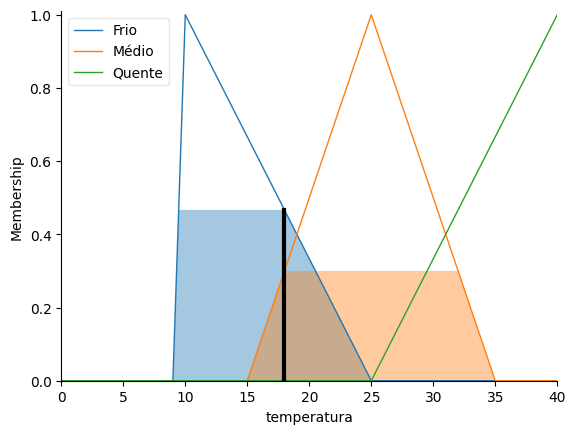

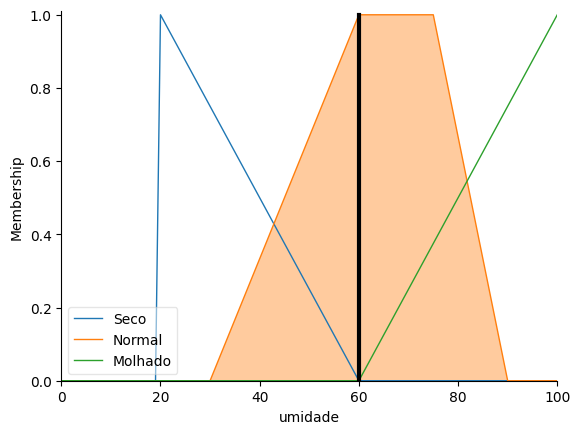

In [ ]:
 # Plotando os gráficos das funções de pertinência e do resultado
temperatura.view(simulador)
umidade.view(simulador)


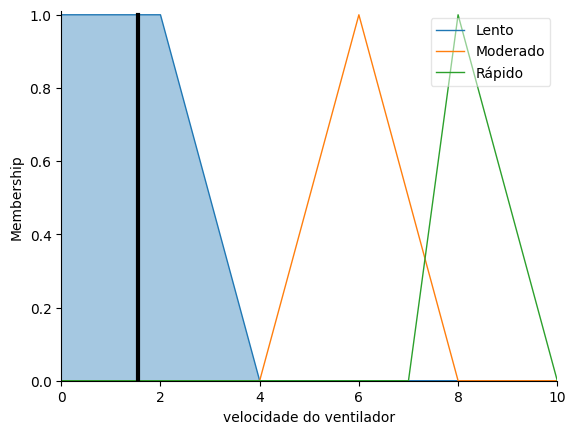

In [ ]:
velocidadeVentilador.view(simulador)